In [2]:
import pandas as pd
import matplotlib as plt
from sklearn.model_selection import train_test_split

In [9]:
df = pd.read_csv('../dataset/Walmart_Sales.csv')

In [10]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [44]:
# The date might influence in case of season, weekend, holidays. We already have a holiday flag, so we just drop the date to make things easier
df = df.drop(columns=['Date'])
df.head()

KeyError: "['Date'] not found in axis"

In [43]:
import seaborn as sns

<Axes: >

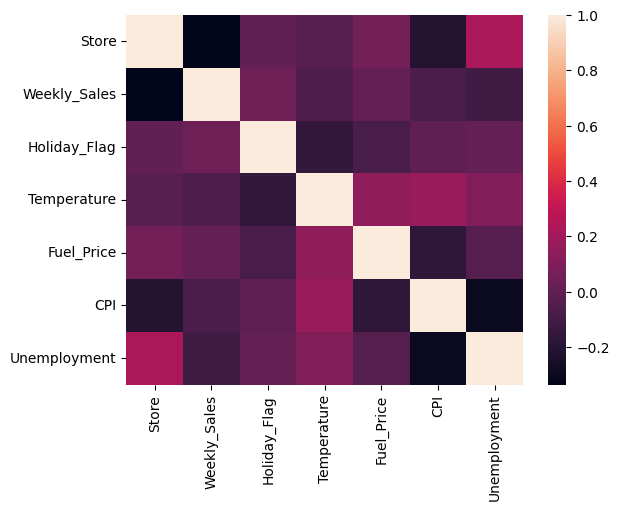

In [29]:
sns.heatmap(df.corr())

<Axes: >

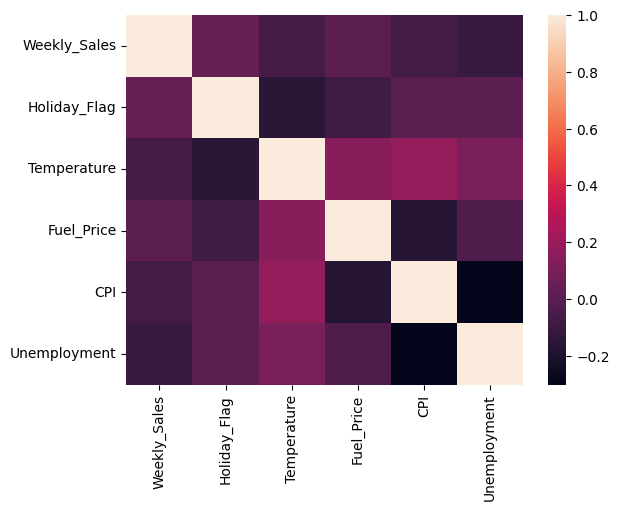

In [30]:
# Dtop the Store column because it seems that it has a low correlation with the sales
df = df.drop(columns=['Store'])
df.head()
sns.heatmap(df.corr())

In [46]:
X = df.drop('Weekly_Sales', axis=1)
Y = df['Weekly_Sales']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(5148, 5)

In [42]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
from sklearn.linear_model import LinearRegression

In [54]:
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
predictions = regressor.predict(X_test)

In [57]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import numpy as np

In [58]:
r2 = r2_score(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
mae = mean_absolute_error(Y_test, predictions)
mape = np.mean(np.abs((predictions - Y_test) / Y_test)) * 100
print("R2: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)
print("MAPE: ", mape)

R2:  0.01738312550370069
MSE:  316554511405.115
MAE:  475432.53295882524
MAPE:  67.69629979266949
